In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

In [9]:
pd.DataFrame(X, columns=breast_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [11]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
pipe.score(X_test, y_test)

0.9649122807017544

In [13]:
# K-FOLD validation 
from sklearn.model_selection import StratifiedKFold
scores = []
KFold = StratifiedKFold(10).split(X_train, y_train)

for k, (train, test) in enumerate(KFold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print(f"{k}: {score:.2f}")

print(f"Mean score {np.mean(scores):.3f} +/- {np.std(scores):.2f}")

0: 0.97
1: 0.97
2: 0.93
3: 0.97
4: 1.00
5: 0.97
6: 0.97
7: 1.00
8: 0.97
9: 0.97
Mean score 0.975 +/- 0.02


In [14]:
# OR
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(pipe, X_train, y_train, cv = 10)
print(f"Mean score {np.mean(scores_2):.3f} +/- {np.std(scores_2):.2f}")

Mean score 0.975 +/- 0.02


In [15]:
pipe_two = make_pipeline(StandardScaler(), LogisticRegression())

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv = 10,train_sizes = np.linspace(0.1, 1, 10))

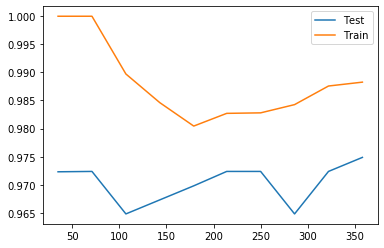

In [17]:
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Test')
plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = 'Train')
plt.legend()
plt.show()

In [18]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99065421, 0.98130841, 0.99065421, 0.99065421, 0.99065421,
        0.99065421, 0.99065421, 0.99065421, 0.99065421, 0.99065421],
       [0.98601399, 0.97202797, 0.98601399, 0.98601399, 0.98601399,
        0.98601399, 0.98601399, 0.98601399, 0.98601399, 0.98601399],
       [0.97765363, 0.98324022, 0.98882682, 0.98882682, 0.97765363,
        0.97765363, 0.97765363, 0.97765363, 0.97765363, 0.97765363],
       [0.97663551, 0.98598131, 0.98598131, 0.99065421, 0.98130841,
        0.98130841, 0.98130841, 0.98130841, 0.98130841, 0.98130841],
       [0.984     , 0.988     , 0.984     , 0.988     , 0.98      ,
        0.984     , 0.98      , 0.98      , 0.98      , 0.98      ],
       [0.98601399, 0.98951049, 0.9860139

In [19]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1, 10]

train_scores, test_scores = validation_curve(estimator=pipe_two, X=X_train, y=y_train, param_name = 'logisticregression__C', param_range=param_range, cv = 10)

In [20]:
pipe_two.get_params() # This is how to get param_name :)

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logisticregression',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'sta

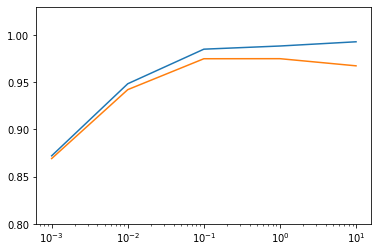

In [21]:
plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))
plt.ylim([0.8, 1.03])
plt.xscale('log')
plt.show()

In [33]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_three = make_pipeline(StandardScaler(), SVC())

param_dict = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},  # First combinations of params
              {'svc__C':param_range, 'svc__kernel': ['rbf'], 
               'svc__gamma': param_range}] # Second combinations of params

gridSearch = GridSearchCV(pipe_three, param_dict, scoring='accuracy', cv = 10)
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            

In [24]:
best_est = gridSearch.best_estimator_

In [25]:
gridSearch.best_score_

0.9798076923076924

In [26]:
scores = cross_val_score(gridSearch, X_train, y_train, cv = 10)

In [28]:
scores

array([0.95      , 0.95      , 0.95      , 0.975     , 1.        ,
       1.        , 1.        , 0.975     , 0.8974359 , 0.97435897])

In [34]:
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(pipe_three, param_grid=param_dict, scoring=scorer, cv = 10)

In [35]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            

In [37]:
print(gs.best_score_)
print(gs.best_params_)

0.9718882238348312
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
